In [2]:
 #step 1 - reading dataset

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Salary_Dataset (1).csv')


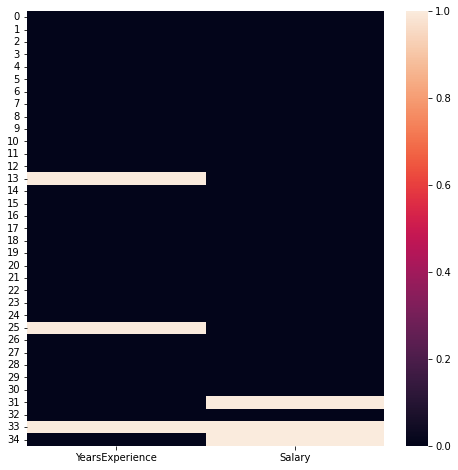

In [3]:
# to check if the data set has any missing values
import seaborn as sb
import matplotlib.pyplot as plt

def get_heatmap(df):
  plt.figure(figsize=(8,8))
  sb.heatmap(df.isnull())
  return plt.show()
  

get_heatmap(df)

<AxesSubplot:>

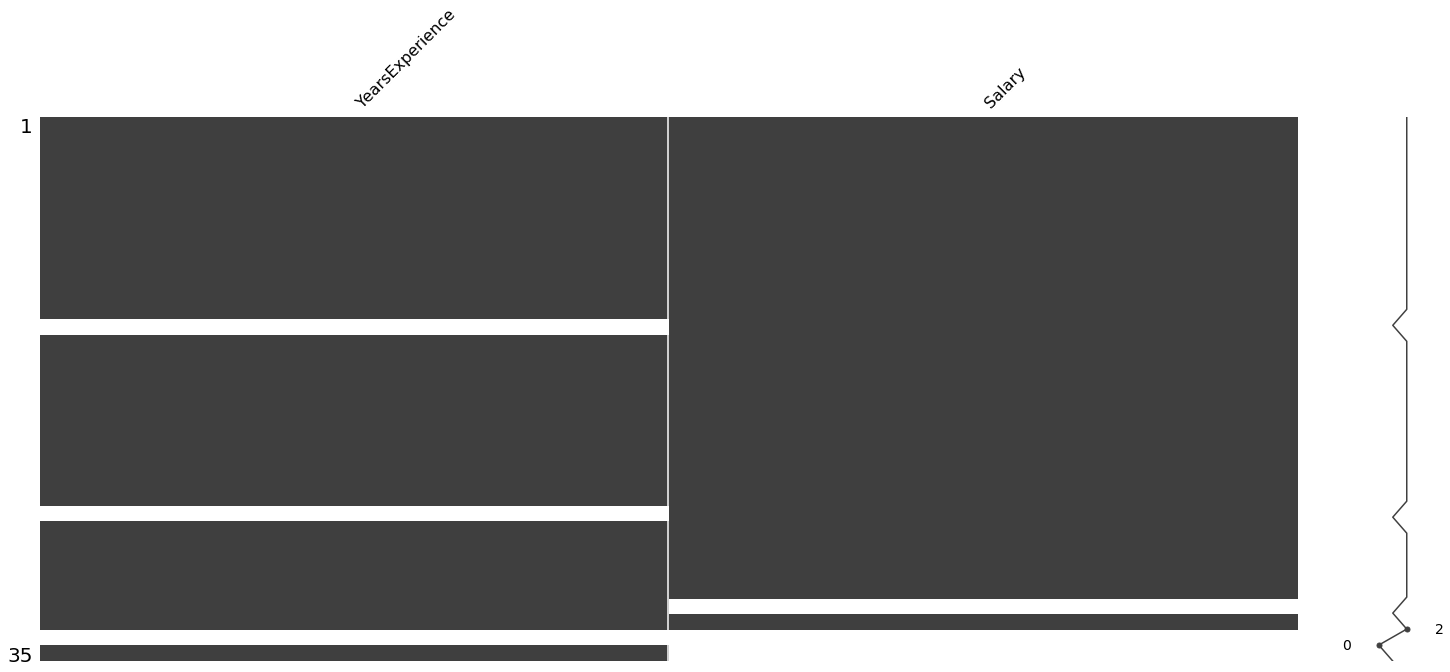

In [4]:
#program to visualize missing data

import missingno as msno

msno.matrix(df)

<AxesSubplot:>

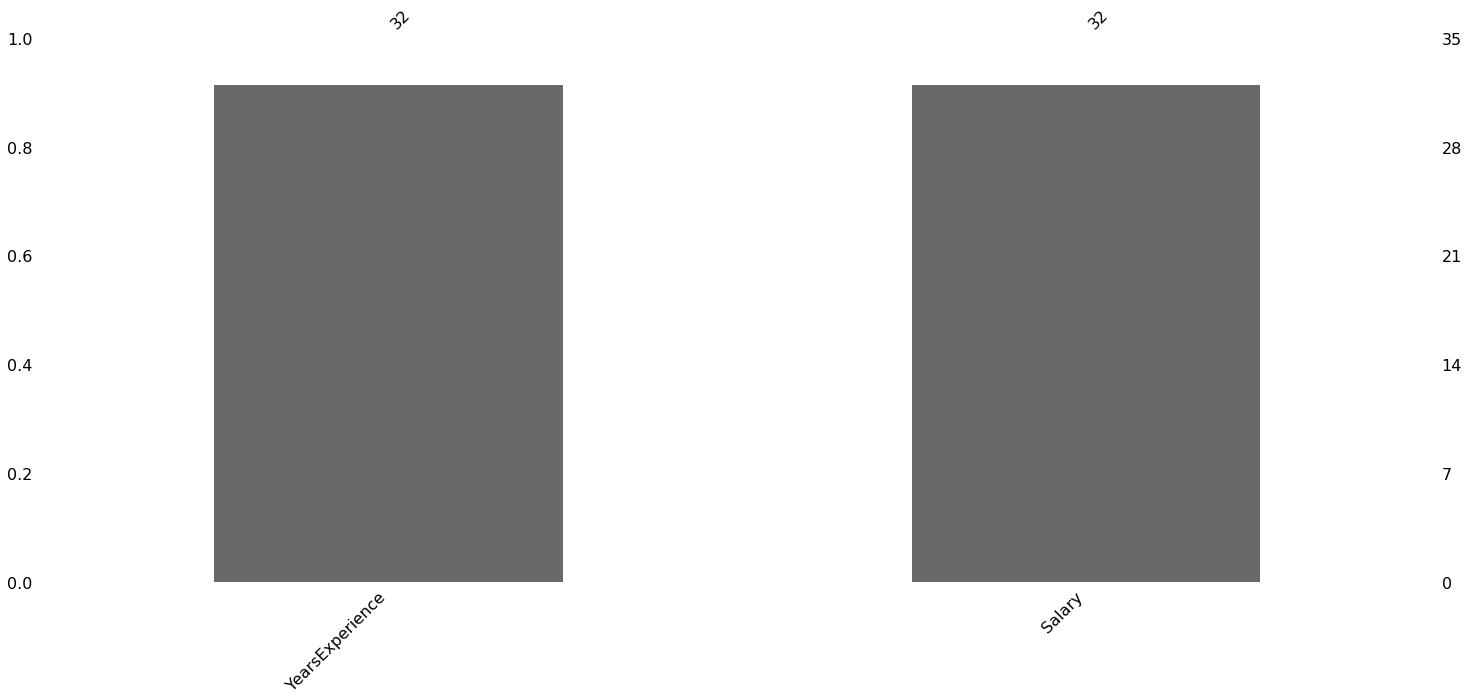

In [5]:
msno.bar(df)

In [6]:
# step 3: Pre- processing

In [7]:
# replacing nan values wit median and mean
import math
median_years=df['YearsExperience'].median()

mean_salary=math.floor(df['Salary'].mean())


df['YearsExperience']=df['YearsExperience'].fillna(median_years)
df['Salary']=df['Salary'].fillna(mean_salary)

In [8]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


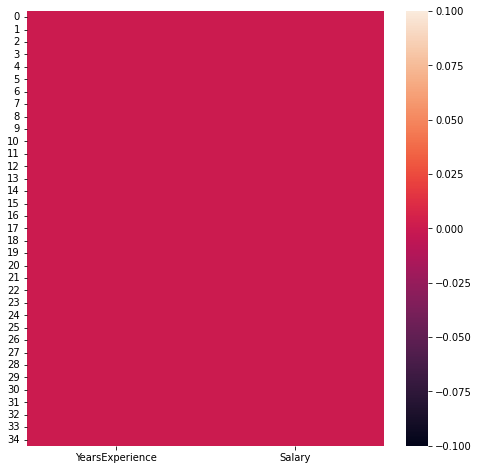

In [9]:
get_heatmap(df)

In [10]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


**Step 4: Prepare data**

In [11]:
'''
X=df['YearsExperience']
Y=df['Salary']
'''

# we need to feed 2d data only to an ML model
X=df.iloc[:,:-1].values
Y=df.iloc[:,1:].values

**Step 5: splitting the dataset**

In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [13]:
print(X_train)
print(X_test)

[[9.5]
 [4.1]
 [9.5]
 [9. ]
 [3.2]
 [4.7]
 [2.9]
 [5.3]
 [4.5]
 [4. ]
 [8.7]
 [1.3]
 [4. ]
 [3. ]
 [8.2]
 [2.2]
 [5.9]
 [7.1]
 [6. ]
 [3.7]
 [3.2]
 [4.7]
 [2. ]
 [1.1]]
[[10.5]
 [ 6.8]
 [ 5.1]
 [10.3]
 [ 7.9]
 [ 4.9]
 [ 3.9]
 [ 1.5]
 [ 4. ]
 [ 9.6]
 [ 4.7]]


**Step 6: Fitting the algorithm**

In [14]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()

In [15]:
model.fit(X_train,Y_train)

LinearRegression()

**Step 7: Testing the model**

In [16]:
Y_predict=model.predict(X_test)

**Step 8: Model Evaluation**

Text(0.5, 1.0, 'ML Model Exam Results')

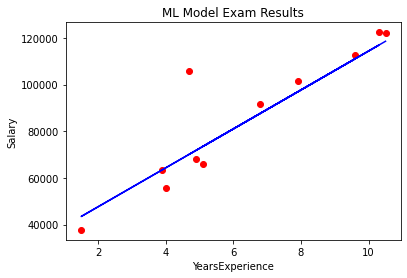

In [17]:
import matplotlib.pyplot as plt

# Visualising the test result

plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test,Y_predict,'b')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title("ML Model Exam Results")

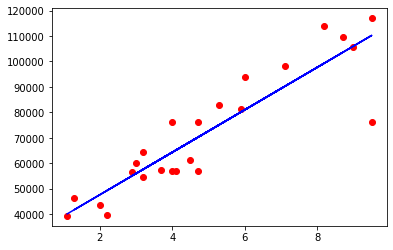

In [18]:
plt.scatter(X_train,Y_train,color='red')
plt.plot(X_train,model.predict(X_train),'b')

In [19]:
accuracy=model.score(X_test,Y_test)
print(accuracy)
print(model.score(X,Y)*100)

0.8212076550363367
82.64290710660246


**Step 9: Deployment**

In [20]:
Years=float(input("Enter Years of Experience of an employee: "))
Salary= model.predict([[Years]])
print("The Salary is: ",Salary)

Enter Years of Experience of an employee: 50
The Salary is:  [[447939.4420879]]
